In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("netflix_titles_corrected.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added_corrected,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9/9/19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9/9/16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,9/8/18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,9/8/18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,9/8/17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# # dropping null value columns to avoid errors
# netflix_df.dropna(inplace = True)

In [4]:
# new data frame with split value columns 
file = netflix_df["listed_in"].str.split(",", n = 1, expand = True)

In [5]:
# making separate genre category column from new data frame 
netflix_df["Genre Main Category"]= file[0]

In [6]:
# making separate sub category column from new data frame
netflix_df["Genre Sub Category"]= file[1]

In [7]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added_corrected,release_year,rating,duration,listed_in,description,Genre Main Category,Genre Sub Category
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9/9/19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Children & Family Movies,Comedies
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9/9/16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy,None
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,9/8/18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Kids' TV,None
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,9/8/18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV,None
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,9/8/17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Comedies,None


In [8]:
# Generate a pie plot showing the distribution of Movies vs TV Shows using pandas
production_type = netflix_df.groupby('type')

# create a DataFrame
production_type_count = pd.DataFrame(production_type['type'].count())
production_type_count

,type
type,
Movie,4265
TV Show,1969


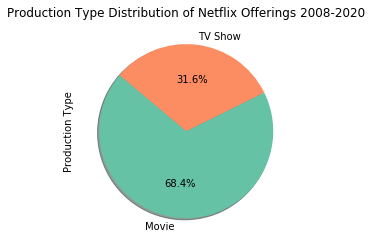

In [62]:
fig, ax = plt.subplots()

production_type_count.plot(kind='pie', y="type", colors=sns.color_palette("Set2"), autopct='%1.1f%%', shadow=True, startangle=140, legend=False, ax=ax)

ax.set_ylabel('Production Type')
ax.set_title("Production Type Distribution of Netflix Offerings 2008-2020")

plt.savefig("figures/TV_Movie_Pie.png")

In [10]:
netflix_df["year added"] = ""
netflix_df.head()

,show_id,type,title,director,cast,country,date_added_corrected,release_year,rating,duration,listed_in,description,Genre Main Category,Genre Sub Category,year added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9/9/19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Children & Family Movies,Comedies,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9/9/16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy,None,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,9/8/18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Kids' TV,None,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,9/8/18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV,None,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,9/8/17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Comedies,None,


In [11]:
# need to clean up 'year added' to remove decimal; think its because you can't convert NaN's to an int32
netflix_df['date_added_corrected'] = pd.to_datetime(netflix_df['date_added_corrected'])
netflix_df['year added'] = netflix_df['date_added_corrected'].dt.year
netflix_df.head()

,show_id,type,title,director,cast,country,date_added_corrected,release_year,rating,duration,listed_in,description,Genre Main Category,Genre Sub Category,year added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Children & Family Movies,Comedies,2019.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy,None,2016.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Kids' TV,None,2018.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV,None,2018.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Comedies,None,2017.0


In [12]:
type_years_df = netflix_df.groupby(['type','year added']).size().reset_index(name='count')
type_years_df['year added'] = type_years_df['year added'].astype('int64')
print(type_years_df)

       type  year added  count
0     Movie        2008      1
1     Movie        2009      2
2     Movie        2010      1
3     Movie        2011     13
4     Movie        2012      4
5     Movie        2013      6
6     Movie        2014     19
7     Movie        2015     58
8     Movie        2016    264
9     Movie        2017    913
10    Movie        2018   1290
11    Movie        2019   1546
12    Movie        2020    147
13  TV Show        2008      1
14  TV Show        2012      3
15  TV Show        2013      6
16  TV Show        2014      6
17  TV Show        2015     32
18  TV Show        2016    192
19  TV Show        2017    387
20  TV Show        2018    492
21  TV Show        2019    803
22  TV Show        2020     37


type         Movie  TV Show
year added                 
2008           1.0      1.0
2009           2.0      NaN
2010           1.0      NaN
2011          13.0      NaN
2012           4.0      3.0
2013           6.0      6.0
2014          19.0      6.0
2015          58.0     32.0
2016         264.0    192.0
2017         913.0    387.0
2018        1290.0    492.0
2019        1546.0    803.0
2020         147.0     37.0


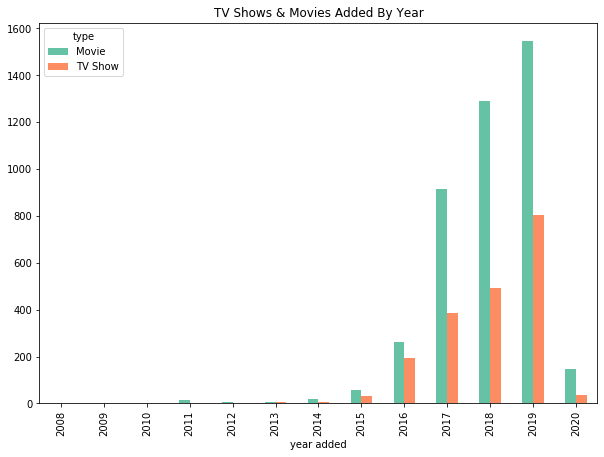

In [63]:
pivot_type_df = type_years_df.pivot(index='year added', columns='type', values='count')
print(pivot_type_df)
pivot_type_df.loc[:,['Movie','TV Show']].plot.bar(color=sns.color_palette("Set2"), figsize=(10,7), title="TV Shows & Movies Added By Year")

plt.savefig("figures/TV_Movie_AddYear.png")

plt.show()

In [21]:
# create bar chart showing genre Main Category content added over the years - Overall
genre_main = netflix_df.groupby("Genre Main Category")

genre_main_count = pd.DataFrame(genre_main["Genre Main Category"].count())
genre_main_count

,Genre Main Category
Genre Main Category,
Action & Adventure,597
Anime Features,12
Anime Series,117
British TV Shows,210
Children & Family Movies,358
Classic & Cult TV,19
Classic Movies,62
Comedies,803
Crime TV Shows,309


In [68]:
genre_df= netflix_df.groupby(['type','year added']).size().reset_index(name='count')
type_years_df['year added'] = type_years_df['year added'].astype('int64')
print(type_years_df)
genre_df = genre_main_count.drop(['Movies', 'TV Shows'])
genre_df

       type  year added  count
0     Movie        2008      1
1     Movie        2009      2
2     Movie        2010      1
3     Movie        2011     13
4     Movie        2012      4
5     Movie        2013      6
6     Movie        2014     19
7     Movie        2015     58
8     Movie        2016    264
9     Movie        2017    913
10    Movie        2018   1290
11    Movie        2019   1546
12    Movie        2020    147
13  TV Show        2008      1
14  TV Show        2012      3
15  TV Show        2013      6
16  TV Show        2014      6
17  TV Show        2015     32
18  TV Show        2016    192
19  TV Show        2017    387
20  TV Show        2018    492
21  TV Show        2019    803
22  TV Show        2020     37


,Genre Main Category
Genre Main Category,
Action & Adventure,597
Anime Features,12
Anime Series,117
British TV Shows,210
Children & Family Movies,358
Classic & Cult TV,19
Classic Movies,62
Comedies,803
Crime TV Shows,309


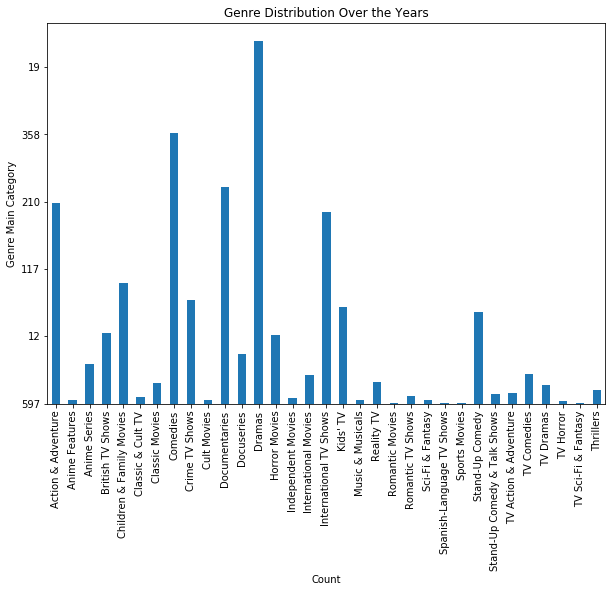

In [73]:
# Need to fix the yaxis ticks
fig, ax = plt.subplots()
genre_df.plot(kind='bar', title="Genre Distribution Over the Years", legend=False, figsize=(10,7), ax=ax)
ax.set_yticklabels(genre_df["Genre Main Category"])
ax.set_xlabel("Count")
ax.set_ylabel("Genre Main Category")

plt.savefig("figures/GenreDist_Bar.png")

In [24]:
# create bar chart showing number of movies & tv shows added over the years - (each year)
genre_years_df = netflix_df.groupby(['Genre Main Category','year added']).size().reset_index(name='count')
genre_years_df['year added'] = genre_years_df['year added'].astype('int64')
print(genre_years_df)

    Genre Main Category  year added  count
0    Action & Adventure        2014      1
1    Action & Adventure        2015      2
2    Action & Adventure        2016     20
3    Action & Adventure        2017    116
4    Action & Adventure        2018    185
..                  ...         ...    ...
185           Thrillers        2016      1
186           Thrillers        2017      5
187           Thrillers        2018      9
188           Thrillers        2019     23
189           Thrillers        2020      2

[190 rows x 3 columns]


In [25]:
# add a histogram, switch main category and count
# fig, ax = plt.subplots()
# genre_df.plot(kind='barh', title="Genre Distribution Over the Years", legend=False, figsize=(10,7), ax=ax)
# ax.set_xlabel("Count")
# ax.set_ylabel("Genre Main Category")

    Genre Main Category  year added  count
0    Action & Adventure        2014      1
1    Action & Adventure        2015      2
2    Action & Adventure        2016     20
3    Action & Adventure        2017    116
4    Action & Adventure        2018    185
..                  ...         ...    ...
185           Thrillers        2016      1
186           Thrillers        2017      5
187           Thrillers        2018      9
188           Thrillers        2019     23
189           Thrillers        2020      2

[190 rows x 3 columns]


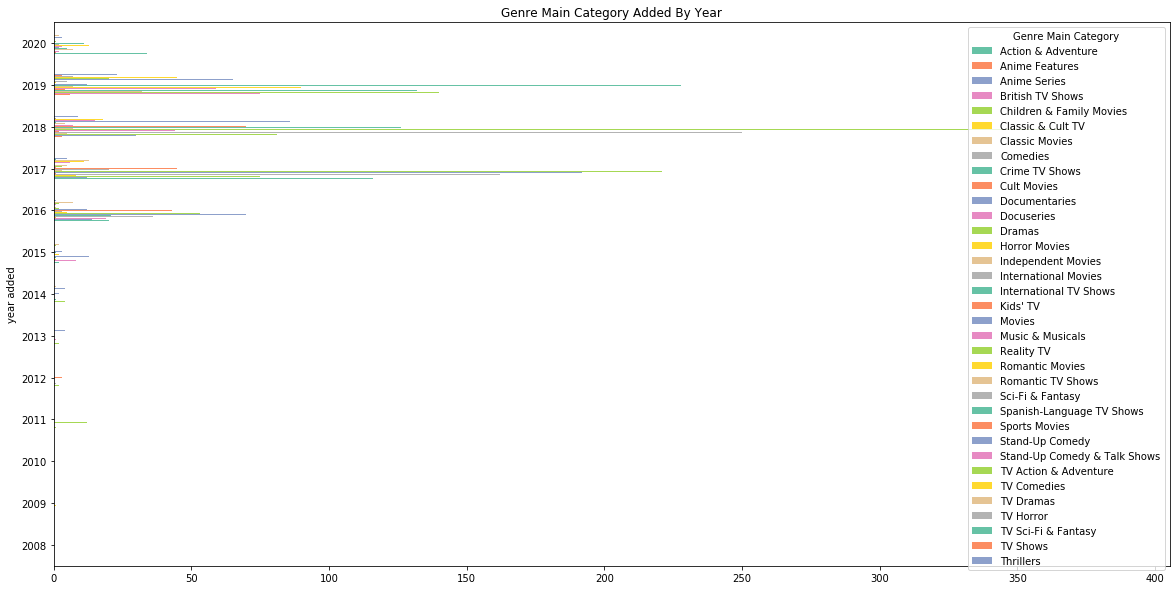

In [26]:
# I do not think we should use this one. Too difficult to read
pivot_genre_years_df = genre_years_df.pivot(index='year added', columns='Genre Main Category', values='count')
print(genre_years_df)
pivot_genre_years_df.plot.barh(color=sns.color_palette("Set2"), figsize=(20,10), title="Genre Main Category Added By Year")
plt.show()

very hard to read this plot

In [27]:
# Shows top 10 Genres in total
genre_main = netflix_df.groupby("Genre Main Category")

genre_top10_count = pd.DataFrame(genre_main["Genre Main Category"].count().nlargest(10).reset_index(name='top10'))
genre_top10_count

,Genre Main Category,top10
0,Dramas,1077
1,Comedies,803
2,Documentaries,644
3,Action & Adventure,597
4,International TV Shows,570
5,Children & Family Movies,358
6,Crime TV Shows,309
7,Kids' TV,288
8,Stand-Up Comedy,273
9,British TV Shows,210


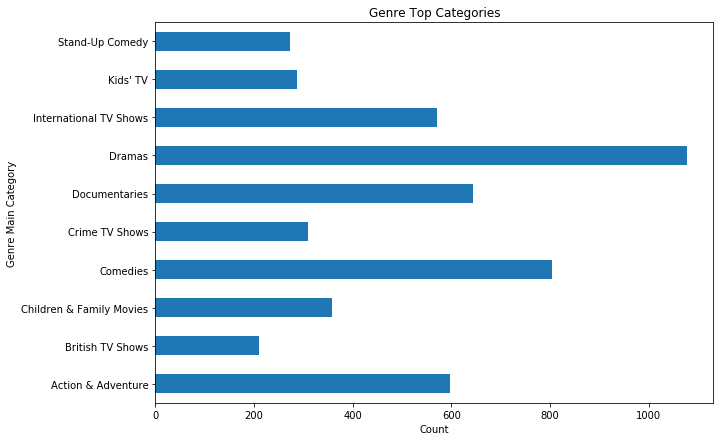

In [74]:
# genre_top_count (sort values by column want to sort by)
fig, ax = plt.subplots()
genre_top10_count.plot(kind='barh', title="Genre Top Categories", legend=False, figsize=(10,7), ax=ax)
ax.set_yticklabels(genre_top10_count["Genre Main Category"])
ax.set_xlabel("Count")
ax.set_ylabel("Genre Main Category")

plt.savefig("figures/TopGenres_Bar.png")

In [29]:
# Shows top 10 Genres added in 2018
year2018_df = netflix_df[(netflix_df['year added'] == 2018)]
genre_main2018 = year2018_df.groupby(['Genre Main Category','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
genre_main2018.head(10)

,Genre Main Category,year added,count
12,Dramas,2018.0,367
7,Comedies,2018.0,250
0,Action & Adventure,2018.0,185
10,Documentaries,2018.0,169
16,International TV Shows,2018.0,126
8,Crime TV Shows,2018.0,90
25,Stand-Up Comedy,2018.0,86
4,Children & Family Movies,2018.0,81
17,Kids' TV,2018.0,70
13,Horror Movies,2018.0,64


In [30]:
# Shows top 10 Genres added in 2019
year2019_df = netflix_df[(netflix_df['year added'] == 2019)]
genre_main2019 = year2019_df.groupby(['Genre Main Category','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
genre_main2019.head(10)

,Genre Main Category,year added,count
12,Dramas,2019.0,386
7,Comedies,2019.0,316
0,Action & Adventure,2019.0,239
16,International TV Shows,2019.0,228
10,Documentaries,2019.0,189
4,Children & Family Movies,2019.0,140
8,Crime TV Shows,2019.0,132
17,Kids' TV,2019.0,104
13,Horror Movies,2019.0,90
3,British TV Shows,2019.0,75


how should I plot these?

In [31]:
# Ratings data
ratings_count = netflix_df.groupby("rating")

ratings_count_df = pd.DataFrame(ratings_count["rating"].count())
ratings_count_df

,rating
rating,
G,37
NC-17,2
NR,218
PG,184
PG-13,286
R,508
TV-14,1698
TV-G,149
TV-MA,2027


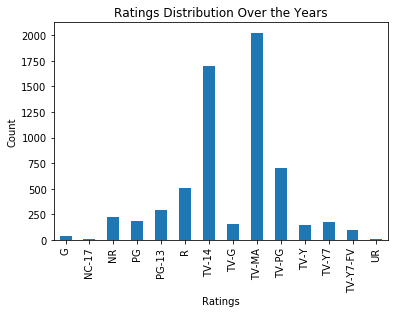

In [75]:
# create bar chart showing Ratings content added over the years - Overall
fig, ax = plt.subplots()
ratings_count_df.plot(kind='bar', title="Ratings Distribution Over the Years", legend=False, ax=ax)
ax.set_xlabel("Ratings")
ax.set_ylabel("Count")

plt.savefig("figures/RatingsDist_Bar.png")

      rating     type  count
0          G    Movie     36
1          G  TV Show      1
2      NC-17    Movie      2
3         NR    Movie    202
4         NR  TV Show     16
5         PG    Movie    183
6         PG  TV Show      1
7      PG-13    Movie    286
8          R    Movie    506
9          R  TV Show      2
10     TV-14    Movie   1038
11     TV-14  TV Show    660
12      TV-G    Movie     80
13      TV-G  TV Show     69
14     TV-MA    Movie   1348
15     TV-MA  TV Show    679
16     TV-PG    Movie    432
17     TV-PG  TV Show    269
18      TV-Y    Movie     41
19      TV-Y  TV Show    102
20     TV-Y7    Movie     69
21     TV-Y7  TV Show    100
22  TV-Y7-FV    Movie     27
23  TV-Y7-FV  TV Show     68
24        UR    Movie      7
type       Movie  TV Show
rating                   
G           36.0      1.0
NC-17        2.0      NaN
NR         202.0     16.0
PG         183.0      1.0
PG-13      286.0      NaN
R          506.0      2.0
TV-14     1038.0    660.0
TV-G        

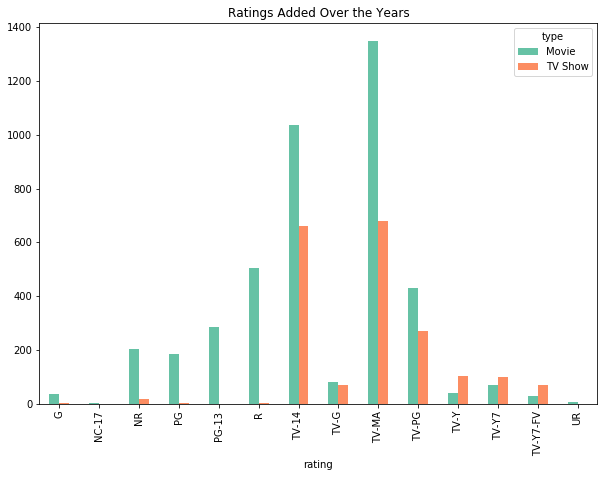

In [77]:
ratings_type_df = netflix_df.groupby(['rating','type']).size().reset_index(name='count')
print(ratings_type_df)

pivotratings_df = ratings_type_df.pivot(index='rating', columns='type', values='count')
print(pivotratings_df)
pivotratings_df.loc[:,['Movie','TV Show']].plot.bar(color=sns.color_palette("Set2"), figsize=(10,7), title="Ratings Added Over the Years")
plt.savefig("figures/Ratings_AddYear.png")

plt.show()

In [35]:
ratings_df = netflix_df.groupby(['rating','year added']).size().reset_index(name='count')
ratings_df['year added'] = ratings_df['year added'].astype('int64')
print(ratings_df)

       rating  year added  count
0           G        2014      1
1           G        2015      1
2           G        2016      2
3           G        2017      4
4           G        2018     15
..        ...         ...    ...
96   TV-Y7-FV        2019     27
97   TV-Y7-FV        2020      1
98         UR        2016      1
99         UR        2017      2
100        UR        2019      4

[101 rows x 3 columns]


       rating  year added  count
0           G        2014      1
1           G        2015      1
2           G        2016      2
3           G        2017      4
4           G        2018     15
..        ...         ...    ...
96   TV-Y7-FV        2019     27
97   TV-Y7-FV        2020      1
98         UR        2016      1
99         UR        2017      2
100        UR        2019      4

[101 rows x 3 columns]


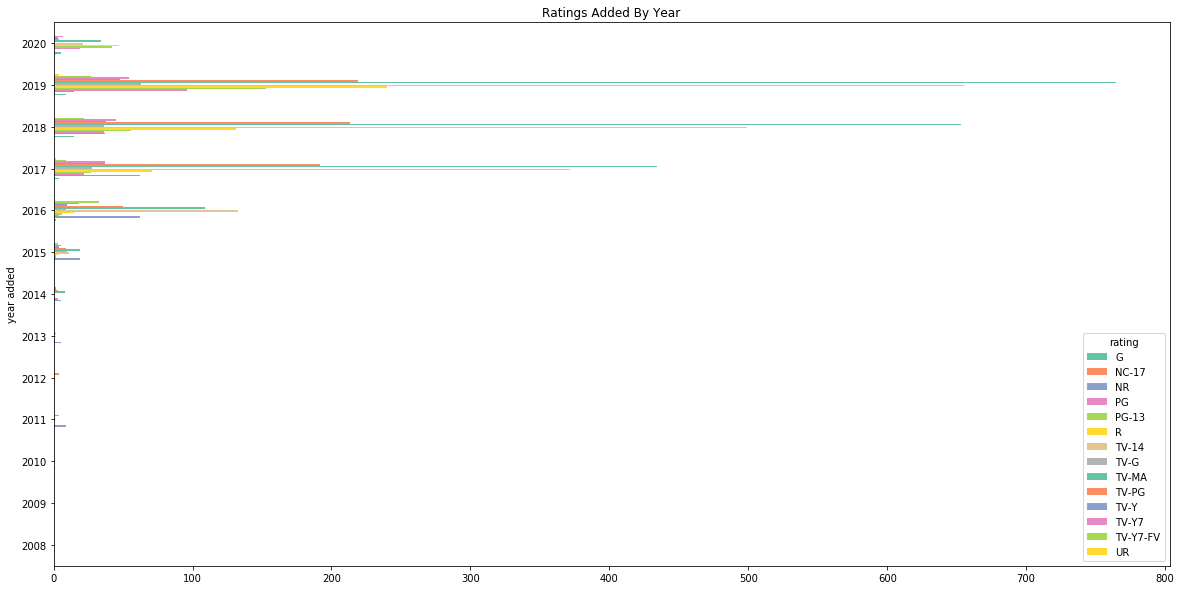

In [36]:
# Create bar chart showing genre Main Category content added over the years - Overall
pivot_df = ratings_df.pivot(index='year added', columns='rating', values='count')
print(ratings_df)
pivot_df.plot.barh(color=sns.color_palette("Set2"), figsize=(20,10), title="Ratings Added By Year")
plt.show()

very hard to read this plot

In [37]:
# Shows top 5 Ratings in total
ratings_top = netflix_df.groupby("rating")

rating_top_count = pd.DataFrame(ratings_top["rating"].count().nlargest(5).reset_index(name='top5'))
rating_top_count

,rating,top5
0,TV-MA,2027
1,TV-14,1698
2,TV-PG,701
3,R,508
4,PG-13,286


In [38]:
# Shows top 5 Ratings added in 2018
year2018_ratings_df = netflix_df[(netflix_df['year added'] == 2018)]
ratings_2018 = year2018_ratings_df.groupby(['rating','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
ratings_2018.head(5)

,rating,year added,count
7,TV-MA,2018.0,653
5,TV-14,2018.0,499
8,TV-PG,2018.0,213
4,R,2018.0,131
3,PG-13,2018.0,56


In [39]:
# Shows top 5 Ratings added in 2019
year2019_ratings_df = netflix_df[(netflix_df['year added'] == 2019)]
ratings_2019 = year2019_ratings_df.groupby(['rating','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
ratings_2019.head(5)

,rating,year added,count
8,TV-MA,2019.0,765
6,TV-14,2019.0,655
5,R,2019.0,240
9,TV-PG,2019.0,219
4,PG-13,2019.0,153


How best to plot these?

TypeError: barh() missing 1 required positional argument: 'width'

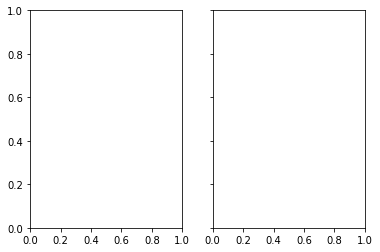

In [58]:
movie_rating = netflix_df.loc[netflix_df['type']=="Movie"]['rating']
# print(movie_rating)

tv_rating = netflix_df.loc[netflix_df['type']=="TV Show"]['rating']
# print(tv_rating)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
# genre_top10_count.plot(kind='barh', title="Genre Top Categories", legend=False, figsize=(10,7), ax=ax)
ax1.barh(movie_rating)
ax2.barh(tv_rating)
ax1.yaxis.tick_right(netflix_df["rating"])
ax1.invert_xaxis()

TypeError: barh() missing 1 required positional argument: 'width'

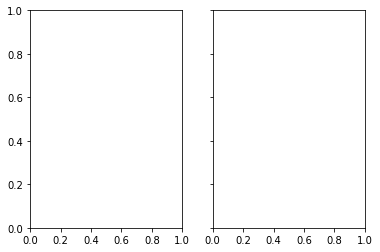

In [55]:
movie_rating = netflix_df.loc[netflix_df['type']=="Movie"]['rating']
# print(movie_rating)

tv_rating = netflix_df.loc[netflix_df['type']=="TV Show"]['rating']
# print(tv_rating)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.barh(movie_rating)
ax2.barh(tv_rating)
ax1.yaxis.tick_right()
ax1.invert_xaxis()


In [41]:
movie_ratings = netflix_df.groupby['ratings'].loc[:,['Movie']]
print(movie_ratings)
                                                

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.yaxis.tick_right()
ax1.invert_xaxis()
ax1.barh(movie_ratings)
ax2.barh(tv_ratings)


# fig, ax = plt.subplots()
# ratings_count_df.plot(kind='bar', title="Ratings Distribution Over the Years", legend=False, ax=ax)
# ax.set_xlabel("Ratings")
# ax.set_ylabel("Count")

TypeError: 'method' object is not subscriptable